In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv("/Users/yogesh/Documents/Documents/Projects/Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [5]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Data Preprocessing

There are 20 variables and 7043 observations in this dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Converting total charges from object to float

#Error with the code --> df['TotalCharges']=df['TotalCharges'].astype(float)

Since from the above, unique values for total charges are 6531, there must be spaces for no value (assuming there won't be 1000 values that are identical to two decimal place)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

Imputing those missing values in Total charges

In [9]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()) 

Now, out of the 20 variables, there are 16 categorical variables and 3 numerical variables and Churn is our predictor variable; And there are no null values in the dataset.

Checking the levels of each categorical variable

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Looking into classfications of the categorical varibles

In [12]:
for i in df.columns:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [13]:
df[df['InternetService']=='No']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
11    7469-LKBCI    Male              0      No         No      16   
16    8191-XWSZG  Female              0      No         No      52   
21    1680-VDCWW    Male              0     Yes         No      12   
22    1066-JKSGK    Male              0      No         No       1   
33    7310-EGVHZ    Male              0      No         No       1   
...          ...     ...            ...     ...        ...     ...   
7017  4807-IZYOZ  Female              0      No         No      51   
7019  9710-NJERN  Female              0      No         No      39   
7020  9837-FWLCH    Male              0     Yes        Yes      12   
7030  0871-OPBXW  Female              0      No         No       2   
7037  2569-WGERO  Female              0      No         No      72   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
11            Yes            No              No  No internet service  ...   
16            Yes            No              No  No internet service  ...   
21            Yes            No              No  No internet service  ...   
22            Yes            No              No  No internet service  ...   
33            Yes            No              No  No internet service  ...   
...           ...           ...             ...                  ...  ...   
7017          Yes            No              No  No internet service  ...   
7019          Yes            No              No  No internet service  ...   
7020          Yes            No              No  No internet service  ...   
7030          Yes            No              No  No internet service  ...   
7037          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
11    No internet service  No internet service  No internet service   
16    No internet service  No internet service  No internet service   
21    No internet service  No internet service  No internet service   
22    No internet service  No internet service  No internet service   
33    No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
7017  No internet service  No internet service  No internet service   
7019  No internet service  No internet service  No internet service   
7020  No internet service  No internet service  No internet service   
7030  No internet service  No internet service  No internet service   
7037  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
11    No internet service        Two year               No   
16    No internet service        One year               No   
21    No internet service        One year               No   
22    No internet service  Month-to-month               No   
33    No internet service  Month-to-month               No   
...                   ...             ...              ...   
7017  No internet service        Two year               No   
7019  No internet service        Two year               No   
7020  No internet service  Month-to-month              Yes   
7030  No internet service  Month-to-month              Yes   
7037  No internet service        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
11      Credit card (automatic)          18.95        326.80      0  
16                 Mailed check          20.65       1022.95      0  
21    Bank transfer (automatic)          19.80        202.25      0  
22                 Mailed check          20.15         20.15      1  
33    Bank transfer (automatic)          20.20         20.20      0  
...                         ...            ...           ...    ...  
7017  Bank transfer (automatic)          20.65       1020.75      0  
7019               Mailed check          20.15        826.00      0  
7020        

Looks good; One thing to notice is that for some services - Online security, device protection etc. internet service is a requirement for the service

# Data Visualization

In [14]:
data = df['Churn'].value_counts().to_frame().reset_index().rename(columns={'index':'Category'})
data['Churn%']=round(data['Churn']/sum(data['Churn'])*100,2)
data

Category  Churn  Churn%
0         0   5174   73.46
1         1   1869   26.54

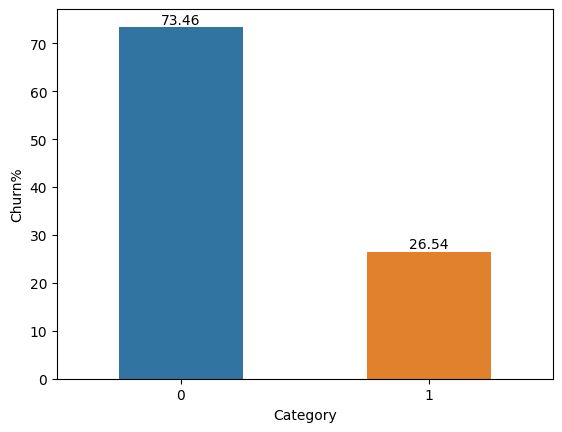

In [15]:
ax = sns.barplot(data=data, x="Category", y="Churn%",width=0.5)
for i in ax.containers:
    ax.bar_label(i,)

The dataset is imbalanced -> obvious for the type of problem that we are working on; Will try to use sampling technique to oversample (SMOTE) the minority/undersample the majority

# Let's now look into the churn distribution for other categorical variables

In [16]:
def bar(var, data=df):
    temp_df_1 = data[var].value_counts().to_frame().reset_index().rename(columns={'index':'Category'})
    temp_df_1['Percentage']= round((temp_df_1[var]/sum(temp_df_1[var]))*100,2)
    ax = sns.barplot(data=temp_df_1, x="Category", y="Percentage",width=0.4)
    for i in ax.containers:
        ax.bar_label(i,)
    temp_df = df.groupby([var, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    fig = px.bar(temp_df, x=var, y='Count', color='Churn', title=f'Churn rate by {var}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.update_layout(width = 400)
    return fig

Gender - almost equally distribution; Churn distribution shows no bias

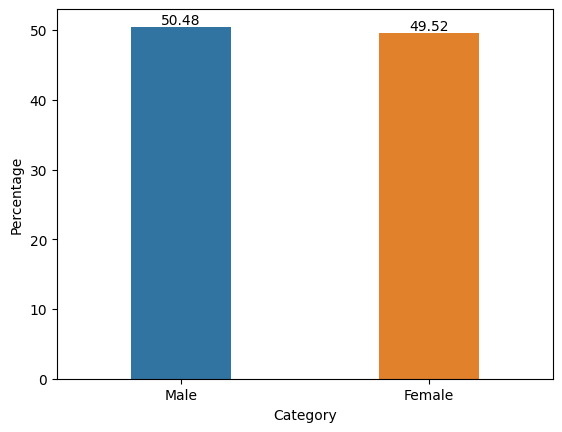

In [17]:
bar('gender')

Senior Citizen; Looks like Senior citizens higher churn rate than the other group but the senior citizen group size is pretty small (16%)

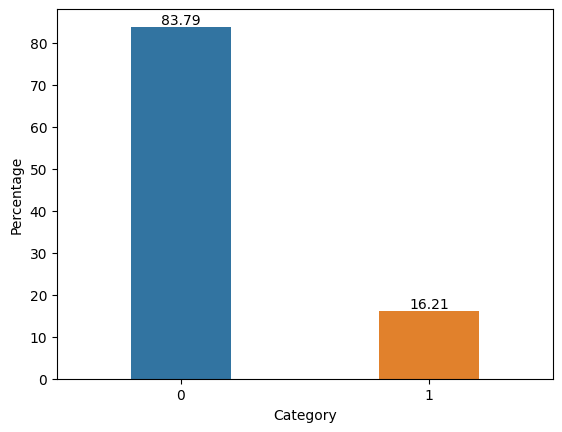

In [18]:
bar('SeniorCitizen')

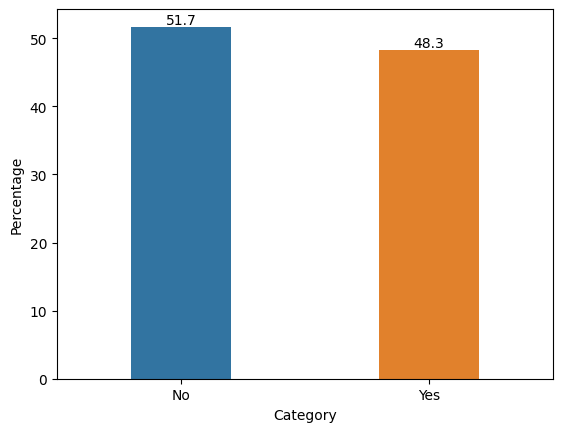

In [19]:
bar('Partner')

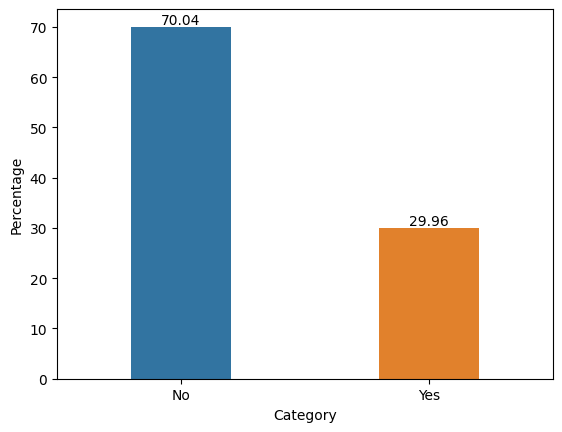

In [20]:
bar('Dependents')

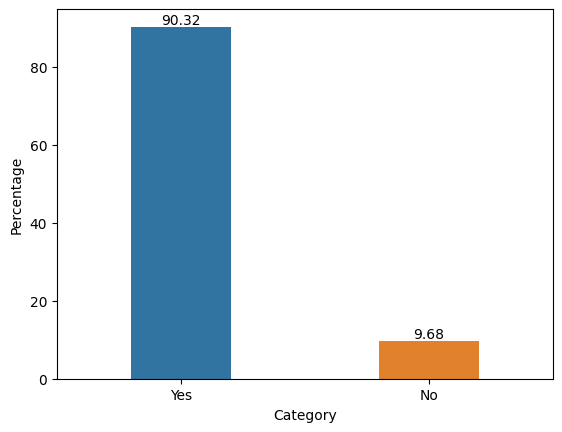

In [21]:
bar('PhoneService')

In [22]:
df[df['PhoneService']=='No'] #Those 10% have availed internet service and other services

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
3     7795-CFOCW    Male              0      No         No      45   
7     6713-OKOMC  Female              0      No         No      10   
20    8779-QRDMV    Male              1      No         No       1   
27    8665-UTDHZ    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
7003  4501-VCPFK    Male              0      No         No      26   
7007  2274-XUATA    Male              1     Yes         No      72   
7029  2235-DWLJU  Female              1      No         No       6   
7036  7750-EYXWZ  Female              0      No         No      12   
7040  4801-JZAZL  Female              0     Yes        Yes      11   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
3              No  No phone service             DSL            Yes  ...   
7              No  No phone service             DSL            Yes  ...   
20             No  No phone service             DSL             No  ...   
27             No  No phone service             DSL             No  ...   
...           ...               ...             ...            ...  ...   
7003           No  No phone service             DSL             No  ...   
7007           No  No phone service             DSL            Yes  ...   
7029           No  No phone service             DSL             No  ...   
7036           No  No phone service             DSL             No  ...   
7040           No  No phone service             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
7                  No          No          No              No  Month-to-month   
20                Yes          No          No             Yes  Month-to-month   
27                 No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7003              Yes         Yes          No              No  Month-to-month   
7007              Yes         Yes         Yes             Yes        Two year   
7029               No          No         Yes             Yes  Month-to-month   
7036              Yes         Yes         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
3                  No  Bank transfer (automatic)          42.30       1840.75   
7                  No               Mailed check          29.75        301.90   
20                Yes           Electronic check          39.65         39.65   
27                 No           Electronic check          30.20         30.20   
...               ...                        ...            ...           ...   
7003               No           Electronic check          35.75       1022.50   
7007              Yes  Bank transfer (automatic)          63.10       4685.55   
7029              Yes           Electronic check          44.40        263.05   
7036               No           Electronic check          60.65        743.30   
7040              Yes           Electronic check          29.60        346.45   

      Churn  
0         0  
3         0  
7         0  
20        1  
27        1  
...     ...  
7003      0  
7007      0  
7029      0  
7036      0  
7040      0  

[682 rows x 21 columns]

Multiple Lines: Looks like Churn rate for Multiple lines is higher than single lines -> hypothesizing that service for multiple lines might not be levelling with the service provided for single lines forcing the customers look for alternatives? -> These are also the customers that contri. more to the business

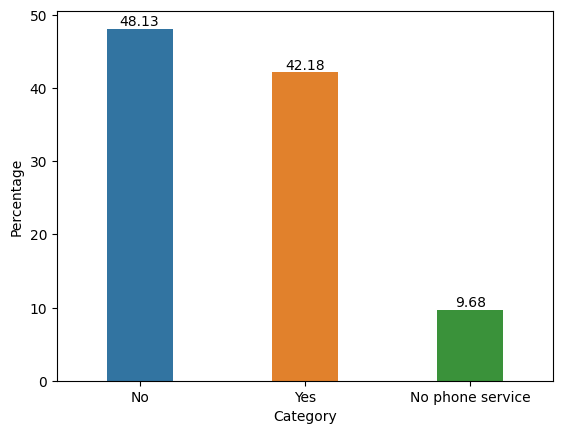

In [23]:
bar('MultipleLines')

Fiber Optic particularly has higher churn rate -> customers not happy about the service offered considering the charges -> would be interested to look into other variables where internet service is Fiber Optic or correlation between Fiber Optic and other variables

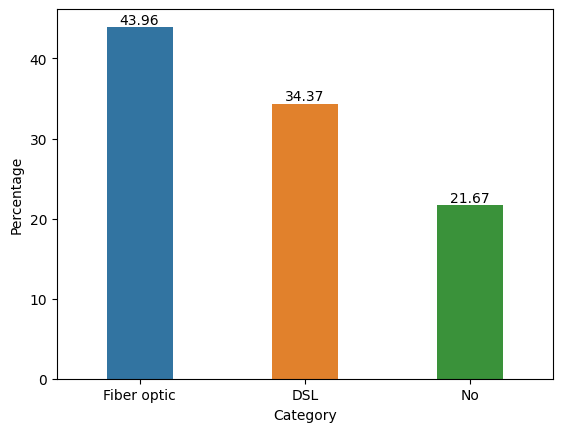

In [24]:
bar('InternetService')

In [25]:
df[df['InternetService']=='Fiber optic'].TotalCharges.describe()

count    3096.000000
mean     3205.304570
std      2570.220105
min        68.500000
25%       795.125000
50%      2660.650000
75%      5451.375000
max      8684.800000
Name: TotalCharges, dtype: float64

In [26]:
df[df['InternetService']=='DSL'].TotalCharges.describe()

count    2421.000000
mean     2120.126953
std      1878.240583
min        23.450000
25%       435.450000
50%      1611.150000
75%      3487.950000
max      6859.050000
Name: TotalCharges, dtype: float64

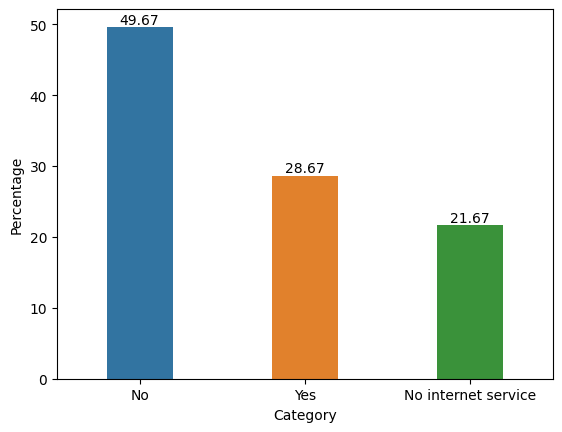

In [27]:
bar('OnlineSecurity')

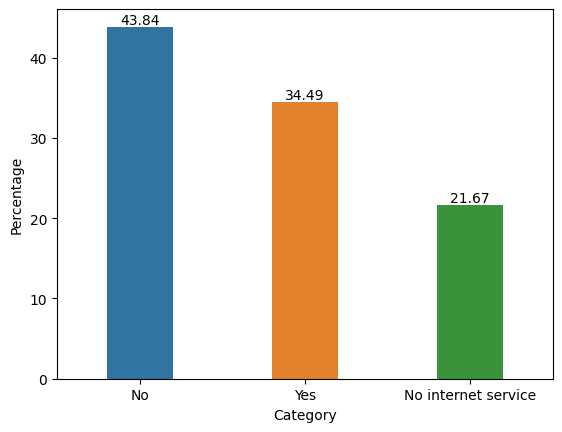

In [28]:
bar('OnlineBackup')

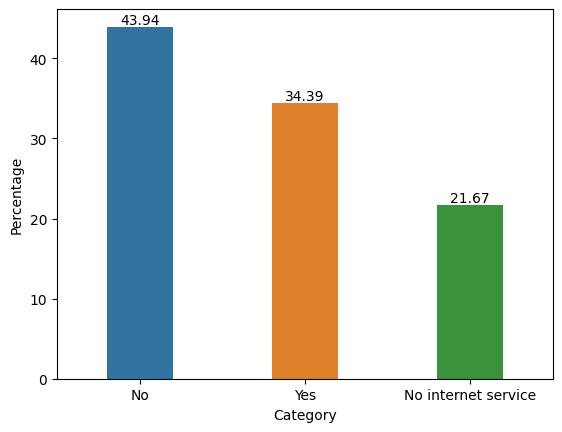

In [29]:
bar('DeviceProtection')

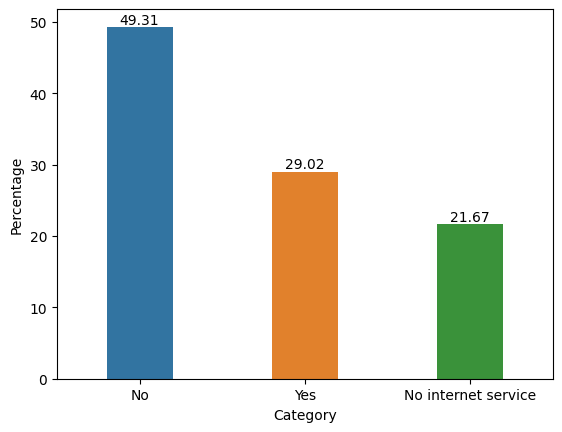

In [30]:
bar('TechSupport')

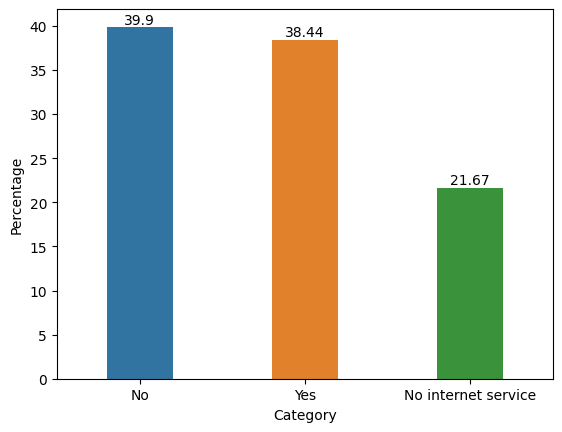

In [31]:
bar('StreamingTV')

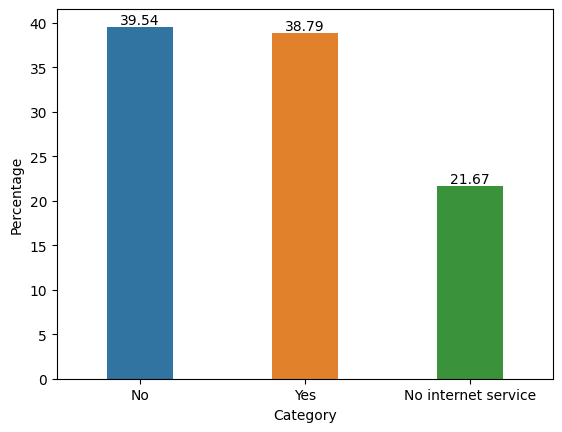

In [32]:
bar('StreamingMovies')

Contract - The lesser the period of contract higher is the churn rate which makes sense as customer won't have long term association and don't feel the necessity to stay with the same service provider if they don't like the service

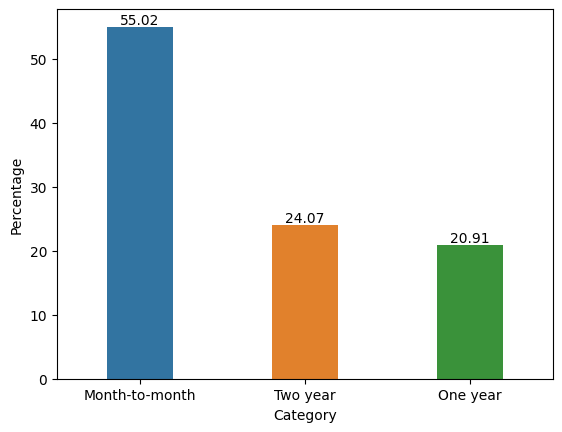

In [33]:
bar('Contract')

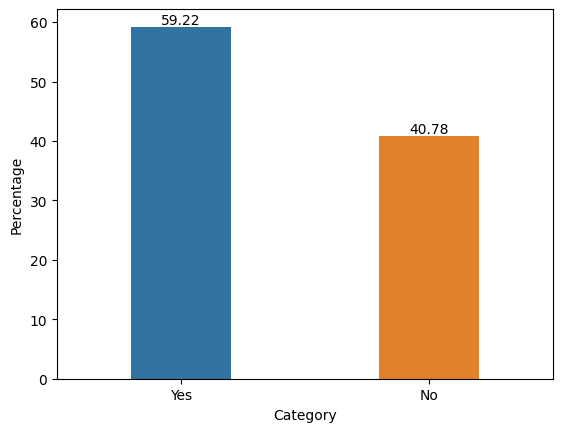

In [34]:
bar('PaperlessBilling')

Payment Method: Looks Like there is some friction with E.Check but would be interested to look into other variables before developing hypothesis

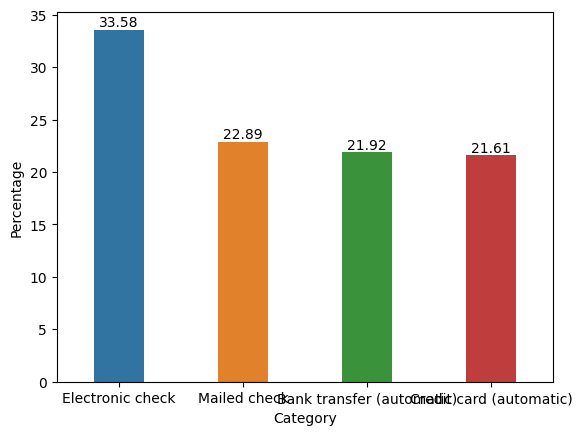

In [35]:
bar('PaymentMethod')

# Let's now look into the churn distribution for Numerical variables

Tenure - Extension of the variable contract -> lower the tenure, higher the churn rate

In [36]:
data = df.groupby(['tenure','Churn']).size().to_frame().reset_index().rename(columns={'index':'Tenure',0:'Count'})
fig = px.histogram(data, x='tenure', y='Count', color='Churn', title=f'Tenure vs Churn Histogram', color_discrete_sequence=["darkgreen", "red"])
fig.show()

MonthlyCharges - Makes sense to see higher churn rate for higher monthly charges-> hypothesizing that customers must have availed more services and churned out when the service quality didn't meet the expectations

In [37]:
data = df.groupby(['MonthlyCharges','Churn']).size().to_frame().reset_index().rename(columns={'index':'MonthlyCharges',0:'Count'})
fig = px.histogram(data, x='MonthlyCharges', y='Count', color='Churn', title=f'MonthlyCharges vs Churn Histogram', color_discrete_sequence=["darkgreen", "red"])
fig.show()

TotalCharges

In [38]:
data = df.groupby(['TotalCharges','Churn']).size().to_frame().reset_index().rename(columns={'index':'TotalCharges',0:'Count'})
fig = px.histogram(data, x='TotalCharges', y='Count', color='Churn', title=f'TotalCharges vs Churn Histogram', color_discrete_sequence=["darkgreen", "red"],nbins=20)
fig.show()

# Data Preprocessing

#We need to create dummy variables for categorical but before that splitting the data into train and test to avoid spillage of information from test to train

<AxesSubplot: title={'center': 'Class distributuion of input data'}, xlabel='Churn'>

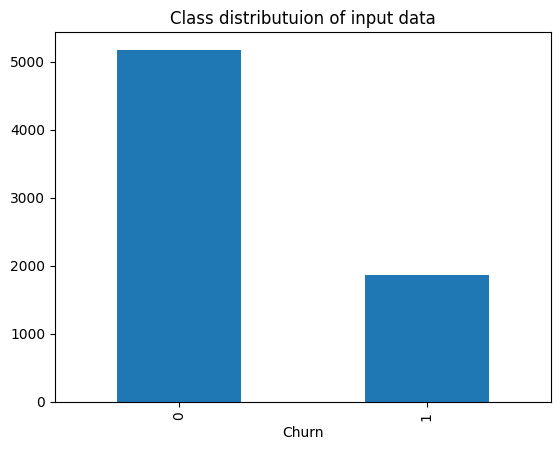

In [39]:
df.pivot_table(index='Churn', aggfunc='size').plot(kind='bar', title='Class distributuion of input data')

In [40]:
#Test<>train split and then looking for correlation
#Using stratify because of the imbalanced dataset

In [41]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.3, random_state=50,stratify=df.Churn)

<AxesSubplot: title={'center': 'Verify that class distributuion in train is same as input data'}, xlabel='Churn'>

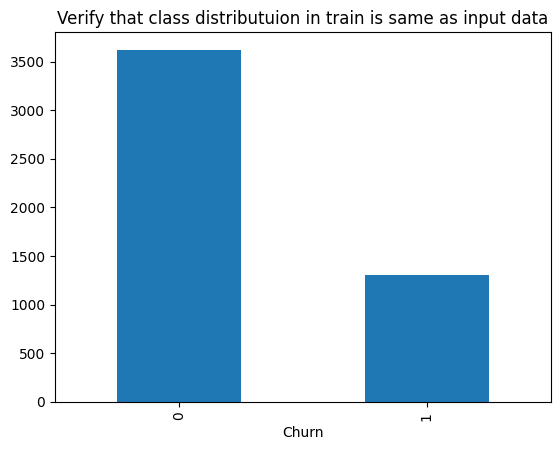

In [42]:
train.pivot_table(index='Churn', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')


In [43]:
x_train = train.drop(['Churn','customerID'],axis=1)
y_train = train.Churn

In [44]:
x_test = test.drop(['Churn','customerID'],axis=1)
y_test = test.Churn

In [45]:
#get dummies
x_train_dummies = pd.get_dummies(x_train, drop_first = True)
x_test_dummies = pd.get_dummies(x_test, drop_first = True)

Text(0.5, 1.0, 'Correlation Heatmap')

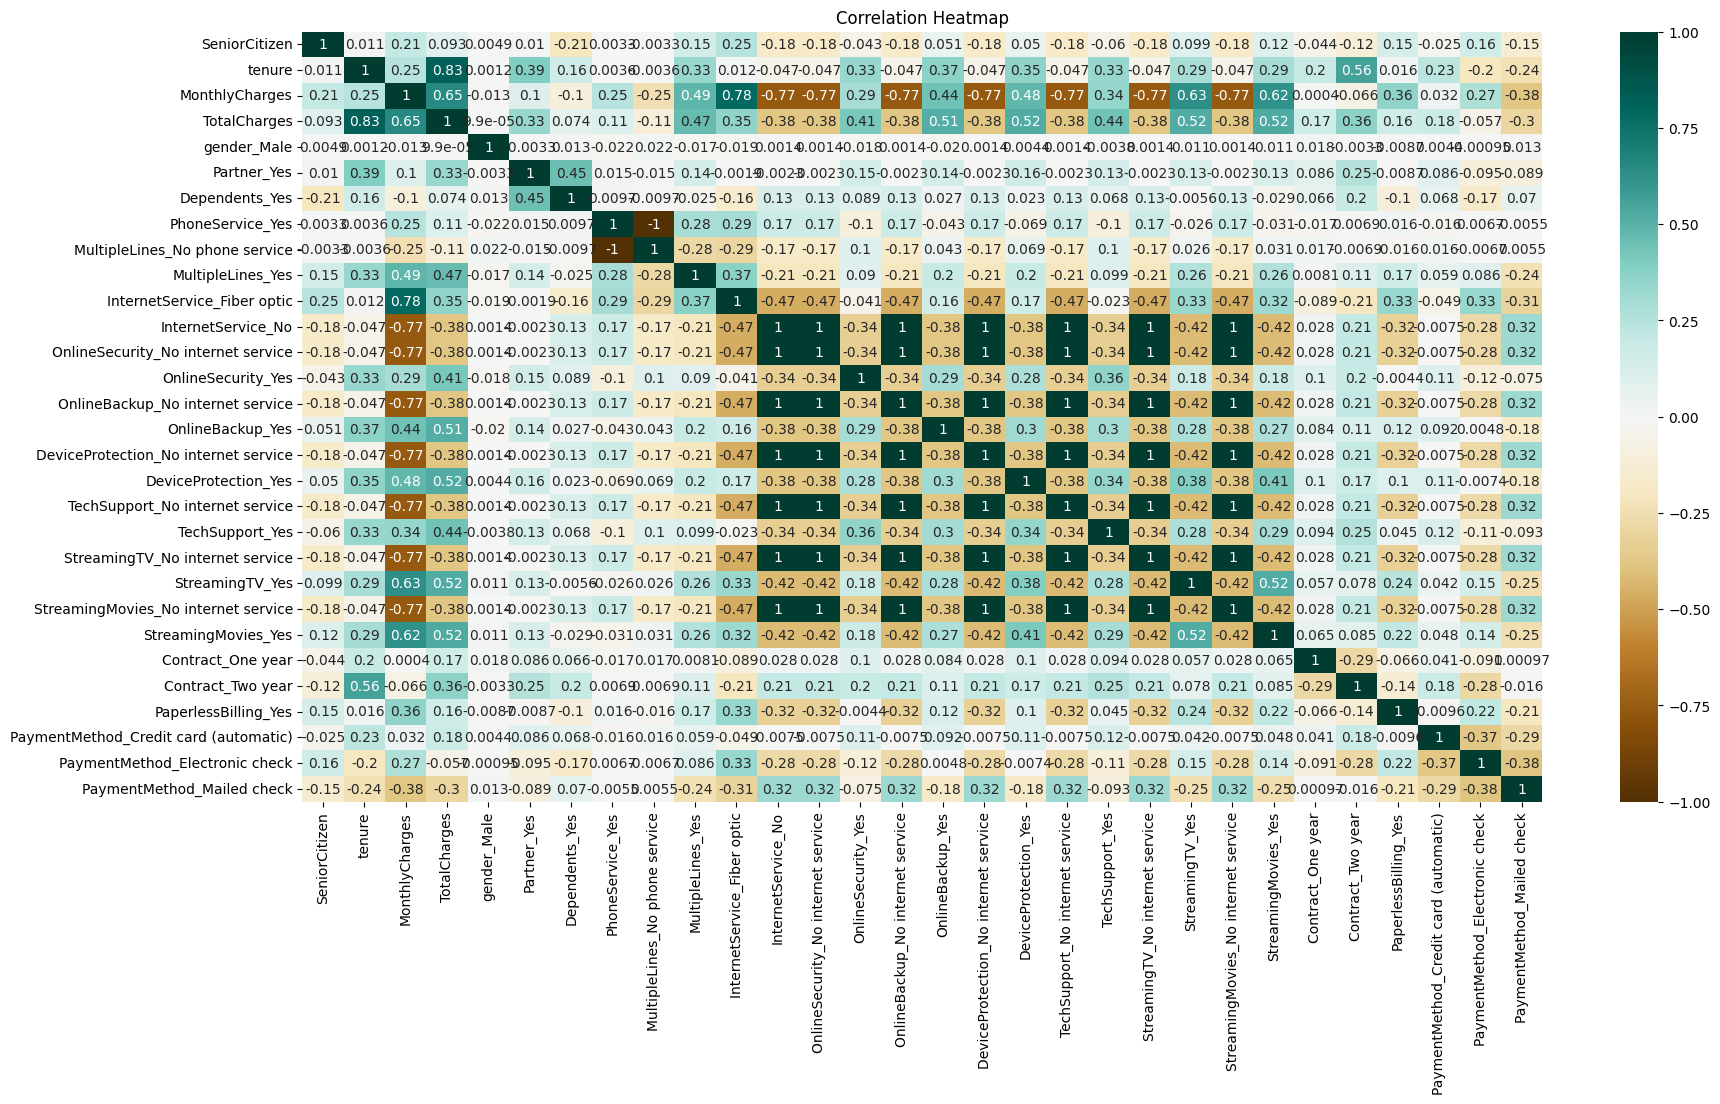

In [46]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
mask=np.triu(np.ones_like(x_train_dummies.corr()))
heatmap=sns.heatmap(x_train_dummies.corr(),vmin=-1,vmax=1,annot=True,cmap="BrBG")
heatmap.set_title("Correlation Heatmap")

#No internet service features are highly correlated -> can be dropped; multiple lines no phone service correclated perfectly with phone service yes; Tenure, monthlycharges, total charges look highly correlated but would give model a lot of information; hence retaining for now;

In [47]:
x_train_new = x_train_dummies.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
                          'TechSupport_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)

In [48]:
x_test_new = x_test_dummies.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
                          'TechSupport_No internet service', 'StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)

In [49]:
x_train_new

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
1992              0      17           83.55       1329.15            0   
2444              1      31           99.95       3186.65            0   
1828              0      42           25.05        949.85            1   
2441              1       2           81.50        162.55            0   
3681              1      46          101.00       4680.05            1   
...             ...     ...             ...           ...          ...   
757               0       3           19.85         57.20            0   
1160              1      23           95.10       2326.05            0   
2954              0       7           75.45        480.75            0   
5652              0       1           48.60         48.60            0   
6755              0      42           79.90       3313.40            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
1992            0               0                 1   
2444            0               0                 1   
1828            0               0                 1   
2441            0               0                 1   
3681            1               0                 1   
...           ...             ...               ...   
757             0               0                 1   
1160            1               0                 1   
2954            0               0                 1   
5652            0               0                 1   
6755            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
1992                               0                  0  ...   
2444                               0                  1  ...   
1828                               0                  1  ...   
2441                               0                  0  ...   
3681                               0                  1  ...   
...                              ...                ...  ...   
757                                0                  0  ...   
1160                               0                  0  ...   
2954                               0                  1  ...   
5652                               0                  0  ...   
6755                               0                  1  ...   

      DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
1992                     0                0                1   
2444                     0                0                1   
1828                     0                0                0   
2441                     0                0                1   
3681                     1                0                1   
...                    ...              ...              ...   
757                      0                0                0   
1160                     0                0                1   
2954                     0                0                0   
5652                     0                0                0   
6755                     1                0                0   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
1992                    0                  0                  0   
2444                    1                  0                  0   
1828                    0                  1                  0   
2441                    0                  0                  0   
3681                    1                  0                  0   
...                   ...                ...                ...   
757                     0                  0                  0   
1160                    1                  0                  0   
2954                    0                  0                  0   
5652                    0                  0                  0   
6755                    0                  0                  0   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
1992                     1                  

In [50]:
#Baseline model

In [51]:

log_model = LogisticRegression()

log_model.fit(x_train_new, y_train)
y_pred_log1 = log_model.predict(x_test_new)

acc_score = accuracy_score(y_test, y_pred_log1)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_log1,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_log1,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_log1, average='weighted')
print("f1_score: ",f_score)



accuracy:  0.7846663511594889
precision:  0.6090534979423868
recall:  0.5276292335115864
f1_score:  0.7794939385938611


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



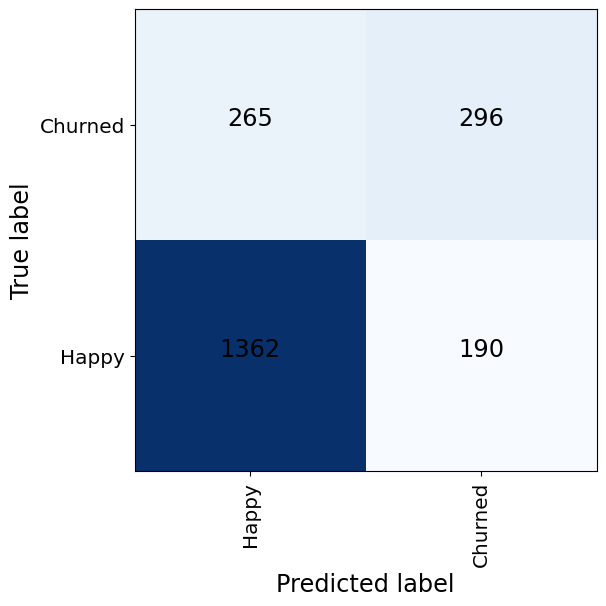

In [52]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred_log1)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

#Add Health and Heart Disease labels to each axis
tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [53]:
#Recall is quite concerning/False negative count is pretty hgiht -> we need to predict customers churning out (True Positive) than customers not churning out (True Negative)
#We can do following methodologies to improve our model
#1. Perform Oversampling of 1s or undersampling of 0s; I will use SMOTE for this problem since undersampling might lead to the loss of valuable data
#2.Feature engineering (Converting numerical variables into bins; create new features from existing ones etc.)
#3.Hyperparameter tuning by gridsearch cross validation

In [54]:
#1. Performing SMOTE

In [55]:
train_dummies_new = pd.concat([x_train_new, y_train], axis=1)

In [56]:
train_dummies_new

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
1992              0      17           83.55       1329.15            0   
2444              1      31           99.95       3186.65            0   
1828              0      42           25.05        949.85            1   
2441              1       2           81.50        162.55            0   
3681              1      46          101.00       4680.05            1   
...             ...     ...             ...           ...          ...   
757               0       3           19.85         57.20            0   
1160              1      23           95.10       2326.05            0   
2954              0       7           75.45        480.75            0   
5652              0       1           48.60         48.60            0   
6755              0      42           79.90       3313.40            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
1992            0               0                 1   
2444            0               0                 1   
1828            0               0                 1   
2441            0               0                 1   
3681            1               0                 1   
...           ...             ...               ...   
757             0               0                 1   
1160            1               0                 1   
2954            0               0                 1   
5652            0               0                 1   
6755            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  TechSupport_Yes  \
1992                               0                  0  ...                0   
2444                               0                  1  ...                0   
1828                               0                  1  ...                0   
2441                               0                  0  ...                0   
3681                               0                  1  ...                0   
...                              ...                ...  ...              ...   
757                                0                  0  ...                0   
1160                               0                  0  ...                0   
2954                               0                  1  ...                0   
5652                               0                  0  ...                0   
6755                               0                  1  ...                0   

      StreamingTV_Yes  StreamingMovies_Yes  Contract_One year  \
1992                1                    0                  0   
2444                1                    1                  0   
1828                0                    0                  1   
2441                1                    0                  0   
3681                1                    1                  0   
...               ...                  ...                ...   
757                 0                    0                  0   
1160                1                    1                  0   
2954                0                    0                  0   
5652                0                    0                  0   
6755                0                    0                  0   

      Contract_Two year  PaperlessBilling_Yes  \
1992                  0                     1   
2444                  0                     1   
1828                  0                     0   
2441                  0                     0   
3681                  0                     1   
...                 ...                   ...   
757                   0                     0   
1160                  0                     1   
2954                  0                     0   
5652                  0                     1   
6755                  0                     0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1992                              

<AxesSubplot: title={'center': 'Verify that class distributuion in train is same as input data'}, xlabel='Churn'>

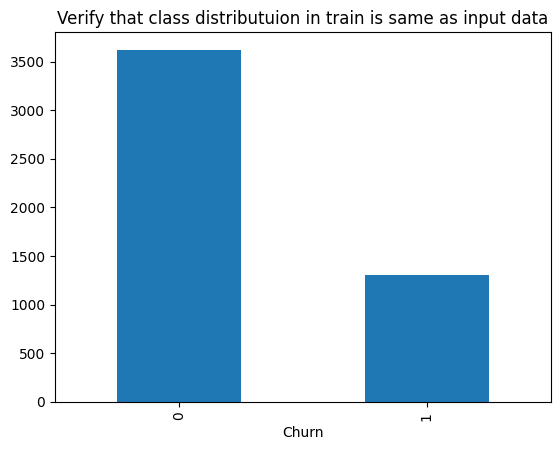

In [57]:
train_dummies_new.pivot_table(index='Churn', aggfunc='size').plot(kind='bar', title='Verify that class distributuion in train is same as input data')

In [58]:
from imblearn.over_sampling import SMOTE
x_resampled_train, y_resampled_train = SMOTE().fit_resample(train_dummies_new.iloc[:,0:24], train_dummies_new['Churn'])

<AxesSubplot: title={'center': 'Class distribution after appying SMOTE'}, xlabel='Churn'>

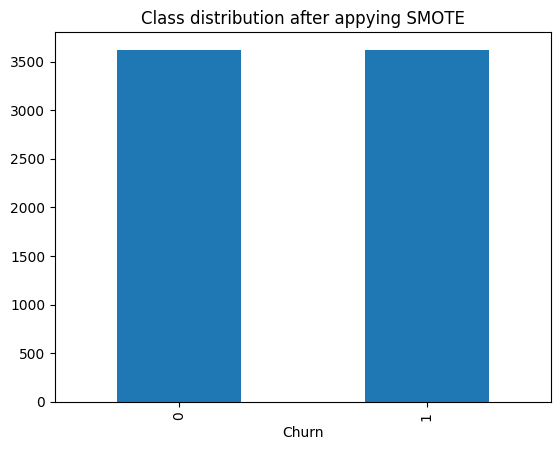

In [59]:
pd.Series(y_resampled_train).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Churn')


In [60]:
x_resampled_train

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0      17       83.550000   1329.150000            0   
1                 1      31       99.950000   3186.650000            0   
2                 0      42       25.050000    949.850000            1   
3                 1       2       81.500000    162.550000            0   
4                 1      46      101.000000   4680.050000            1   
...             ...     ...             ...           ...          ...   
7239              0      15       82.274676   1236.600688            0   
7240              0      30       90.524211   2796.408922            0   
7241              1       5       71.158079    332.542300            0   
7242              0      16       19.693373    343.109050            1   
7243              0       1       50.450000     50.450000            0   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               0               0                 1   
1               0               0                 1   
2               0               0                 1   
3               0               0                 1   
4               1               0                 1   
...           ...             ...               ...   
7239            0               0                 1   
7240            0               0                 1   
7241            0               0                 1   
7242            0               0                 1   
7243            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                  0                  0  ...   
1                                  0                  1  ...   
2                                  0                  1  ...   
3                                  0                  0  ...   
4                                  0                  1  ...   
...                              ...                ...  ...   
7239                               0                  0  ...   
7240                               0                  1  ...   
7241                               0                  0  ...   
7242                               0                  0  ...   
7243                               0                  0  ...   

      DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                        0                0                1   
1                        0                0                1   
2                        0                0                0   
3                        0                0                1   
4                        1                0                1   
...                    ...              ...              ...   
7239                     0                0                0   
7240                     0                0                1   
7241                     0                0                0   
7242                     0                0                0   
7243                     1                0                0   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                       0                  0                  0   
1                       1                  0                  0   
2                       0                  1                  0   
3                       0                  0                  0   
4                       1                  0                  0   
...                   ...                ...                ...   
7239                    0                  0                  0   
7240                    0                  0                  0   
7241                    0                  0                  0   
7242                    0                  0                  0   
7243                    0                  0                  0   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                        1                  

In [61]:

log_model = LogisticRegression()

log_model.fit(x_resampled_train, y_resampled_train)
y_pred_log2 = log_model.predict(x_test_new)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:

acc_score = accuracy_score(y_test, y_pred_log2)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_log2,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_log2,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_log2, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7529578797917653
precision:  0.5286343612334802
recall:  0.6417112299465241
f1_score:  0.7599249468774582


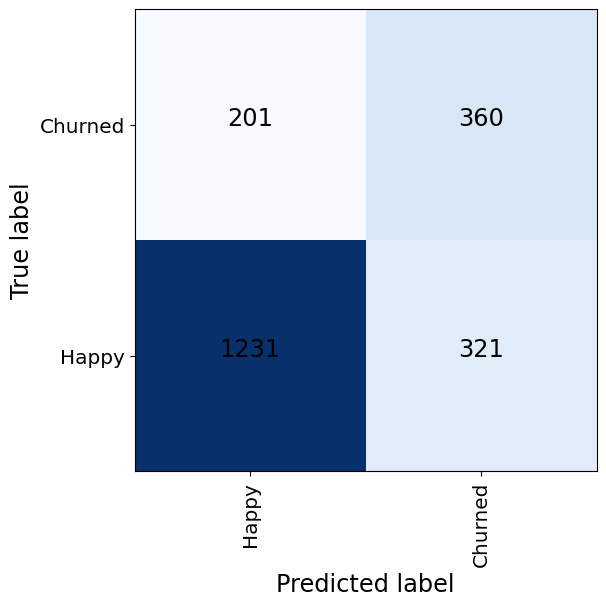

In [63]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred_log2)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

#Add Health and Heart Disease labels to each axis
tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [64]:
#Recall shot up --> good sign/False Negatives went down as well; Accuracy & Precision went down in the process because of the model trying to predict "no" than "Yes" after resampling

In [65]:
#Training a regularized logistic regression model using grid search

#Define model parameters to search over
params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,250,500,750,1000],'penalty':['l1','l2']}

#Define model
model = LogisticRegression(solver='liblinear')

#Define gridsearch - how many CVs (10) and what your scoring method will be (AUC) 
clf = GridSearchCV(model,params, cv=10,scoring='recall')

#Run the gridsearch
clf.fit(x_resampled_train,y_resampled_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500,
                               750, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [66]:
#Liblinear failed to converge --> will try to scale feature and see

In [67]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the numerical columns to be standardized
numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Fit the scaler to the numerical data
scaler.fit(x_resampled_train[numerical_columns])

# Transform the numerical columns to standardized values
x_resampled_train[numerical_columns] = scaler.transform(x_resampled_train[numerical_columns])

#Fit the scaler to test data
scaler.fit(x_test_new[numerical_columns])

x_test_new[numerical_columns] = scaler.transform(x_test_new[numerical_columns])

In [68]:
#Training a regularized logistic regression model using grid search

#Define model parameters to search over
params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,250,500,750,1000],'penalty':['l1','l2']}

#Define model
model = LogisticRegression(solver='liblinear')

#Define gridsearch - how many CVs (10) and what your scoring method will be (AUC) 
clf = GridSearchCV(model,params, cv=10,scoring='roc_auc')

#Run the gridsearch
clf.fit(x_resampled_train,y_resampled_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500,
                               750, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [69]:
y_pred_log_tuned = clf.best_estimator_.predict(x_test_new)

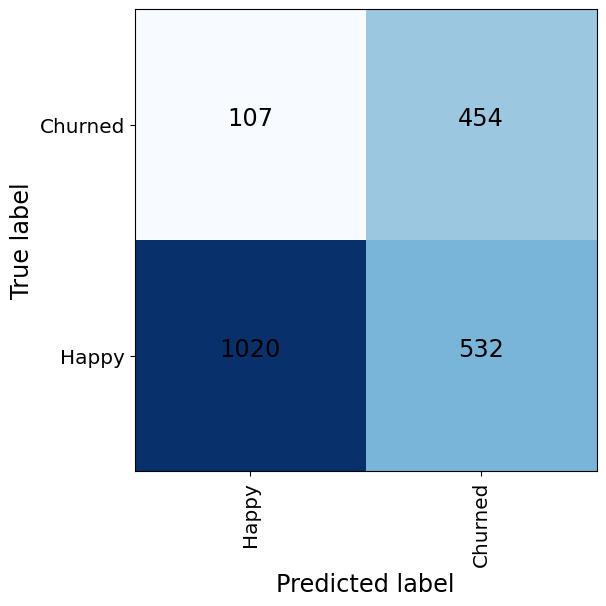

In [70]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred_log_tuned)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

#Add Health and Heart Disease labels to each axis
tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

# CART MODEL

In [71]:
 # Train the CART model
cartMdl = DecisionTreeClassifier(random_state=0,criterion='gini', #split criteria
                                 splitter='best', #how to split (best/greedy or random)
                                 max_depth=None, #max depth
                                 min_samples_split=2,  #min samples per split
                                 min_samples_leaf=1, #min samples per leaf
                                max_features = None,#max number of features to consider for each split
                                class_weight = None) #how to weight the classes for imbalanced problems
cartMdl.fit(x_resampled_train, y_resampled_train)

DecisionTreeClassifier(random_state=0)

In [72]:
y_pred_CART = cartMdl.predict(x_test_new)

In [73]:
acc_score = accuracy_score(y_test, y_pred_CART)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_pred_CART,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_pred_CART,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_pred_CART, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.705631803123521
precision:  0.4580467675378267
recall:  0.5935828877005348
f1_score:  0.7162851304182101


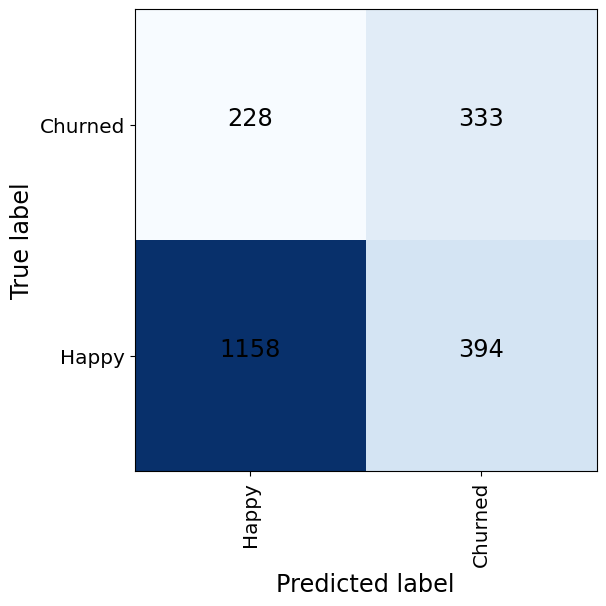

In [74]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_pred_CART)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

#Add Health and Heart Disease labels to each axis
tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [75]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


#Parameter tuning
CARTmod = DecisionTreeClassifier(random_state=0)

#Choose some hyperparameter values 
CARTparams = {'splitter':['random','best'],'max_features':['auto',None],
              'max_depth':randint(1,5),'min_samples_leaf':randint(1,10),
              'class_weight':[None,'balanced'],'criterion':['gini','entropy']}
clfCART_tuned = RandomizedSearchCV(CARTmod,CARTparams,#model and parameters
                             cv=10,#number of cross validation folds
                             scoring='roc_auc',#accuracy metric
                             n_iter=100)#number of random parameter combinations
clfCART_tuned.fit(x_resampled_train,y_resampled_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be rem

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x130b83f50>,
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127f39b50>,
                                        'splitter': ['random', 'best']},
                   scoring='roc_auc')

In [76]:
clfpreds_tuned = clfCART_tuned.best_estimator_.predict(x_test_new)

In [77]:
acc_score = accuracy_score(y_test, clfpreds_tuned)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, clfpreds_tuned,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, clfpreds_tuned,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, clfpreds_tuned, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.6810222432560341
precision:  0.4451988360814743
recall:  0.8181818181818182
f1_score:  0.6996489958720697


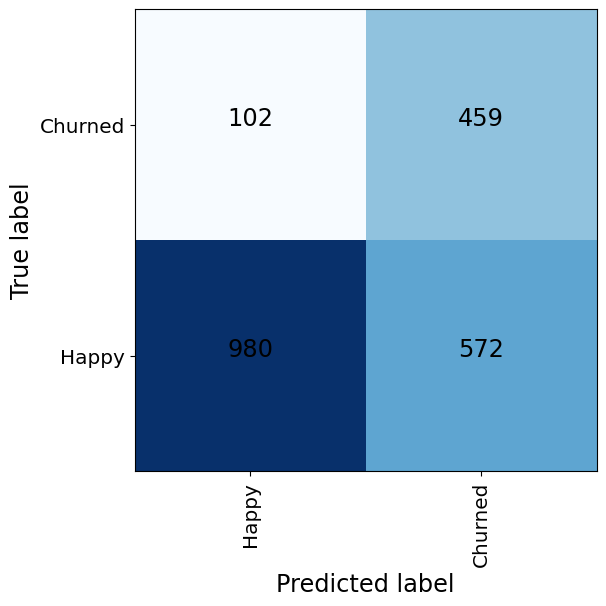

In [78]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = clfpreds_tuned)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

Almost same as Logistic but slightly better in terms of the lesser false negatives! Has increased false positives which would lead the company to take additional care of the customers who are already satisfied with the product and hence its an additional cost to the company but in terms of long term investment, it's a better option. 

# SVM

In [79]:
# SVC
svc = SVC(C=10,kernel = 'rbf', random_state = 0,probability=True)
svc.fit(x_resampled_train, y_resampled_train)
y_predSVC = svc.predict(x_test_new)


In [80]:
acc_score = accuracy_score(y_test, y_predSVC)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_predSVC,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_predSVC,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_predSVC, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7321344060577378
precision:  0.49676584734799484
recall:  0.6844919786096256
f1_score:  0.7436010449137187


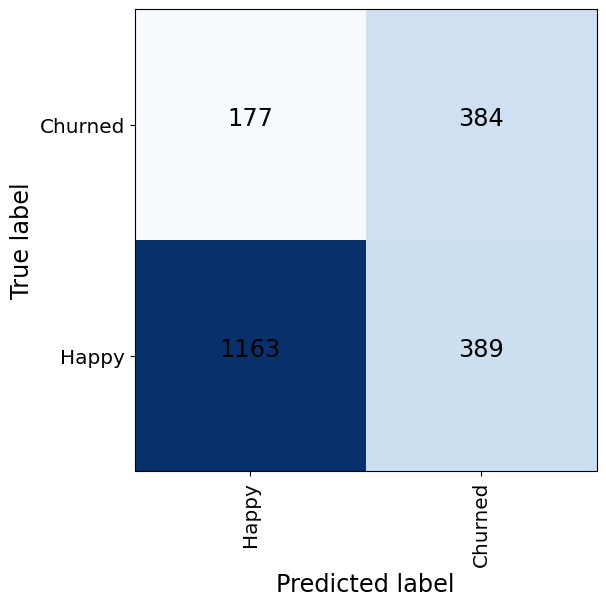

In [81]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_predSVC)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [82]:
#Parameter tuning

In [83]:
SVC_mod = SVC()
SVC_params = [{'kernel': ['linear'], 'C': [1, 10]},
            {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}]
SVC_tuned = RandomizedSearchCV(SVC_mod,SVC_params,#model and parameters
                             cv=10,#number of cross validation folds
                             scoring='roc_auc',#accuracy metric
                             n_iter=100)
SVC_tuned.fit(x_resampled_train,y_resampled_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=100,
                   param_distributions=[{'C': [1, 10], 'kernel': ['linear']},
                                        {'C': [1, 10], 'gamma': [0.001, 0.0001],
                                         'kernel': ['rbf']}],
                   scoring='roc_auc')

In [84]:
y_predSVC_tuned = SVC_tuned.predict(x_test_new)

In [85]:
acc_score = accuracy_score(y_test, y_predSVC_tuned)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_predSVC_tuned,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_predSVC_tuned,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_predSVC_tuned, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7079981069569332
precision:  0.47058823529411764
recall:  0.7985739750445633
f1_score:  0.724686900920224


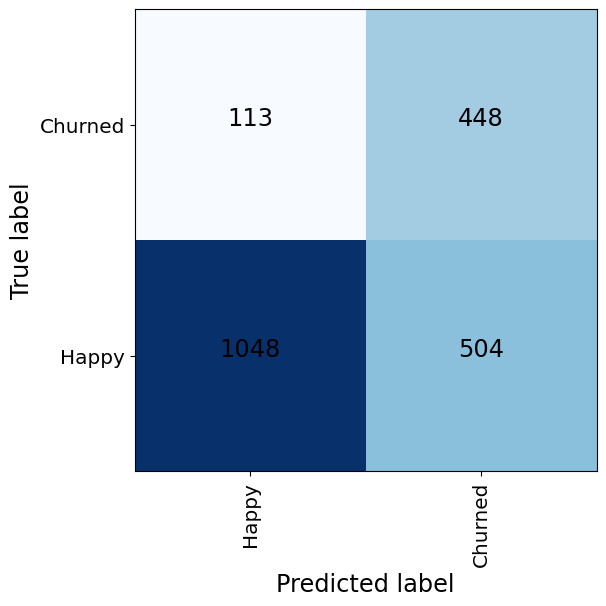

In [86]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_predSVC_tuned)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [87]:
#Better than previous models

# Random Forest Classifier

In [88]:
# SVC
RF = RandomForestClassifier()
RF.fit(x_resampled_train, y_resampled_train)
y_predRF = RF.predict(x_test_new)


In [89]:
acc_score = accuracy_score(y_test, y_predRF)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_predRF,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_predRF,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_predRF, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7539044013251301
precision:  0.5305514157973175
recall:  0.6345811051693404
f1_score:  0.7603700177494241


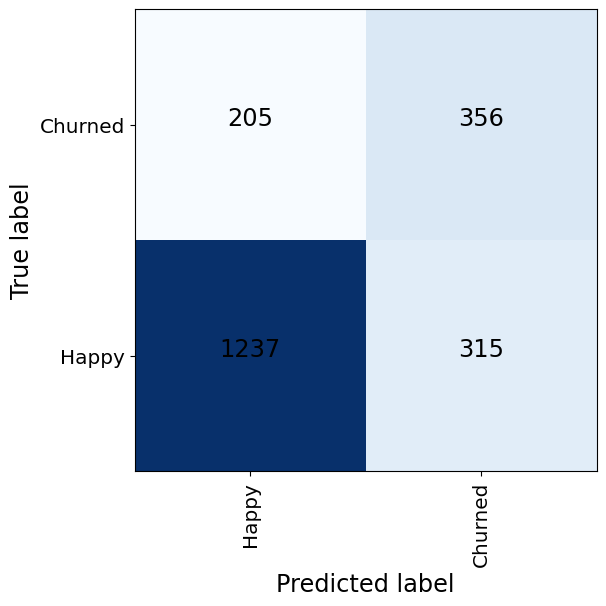

In [90]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_predRF)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')

In [91]:
#RF with hyperparameter tuning
RF_mod = RandomForestClassifier()
RF_params = [{ 'n_estimators': [10, 50], 'min_samples_leaf' : [10, 50] }]
RF_tuned = RandomizedSearchCV(RF_mod,RF_params,#model and parameters
                             cv=10,#number of cross validation folds
                             scoring='roc_auc',#accuracy metric
                             n_iter=100)
RF_tuned.fit(x_resampled_train,y_resampled_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions=[{'min_samples_leaf': [10, 50],
                                         'n_estimators': [10, 50]}],
                   scoring='roc_auc')

In [92]:
y_predRF_tuned = RF_tuned.best_estimator_.predict(x_test_new)

In [93]:
acc_score = accuracy_score(y_test, y_predRF_tuned)
print("accuracy: ",acc_score)
pre_score = precision_score(y_test, y_predRF_tuned,average="binary", pos_label=1)
print("precision: ",pre_score)
rec_score = recall_score(y_test, y_predRF_tuned,average="binary", pos_label=1)
print("recall: ",rec_score)
f_score = f1_score(y_test, y_predRF_tuned, average='weighted')
print("f1_score: ",f_score)

accuracy:  0.7534311405584477
precision:  0.5261096605744126
recall:  0.7183600713012478
f1_score:  0.763758647489694


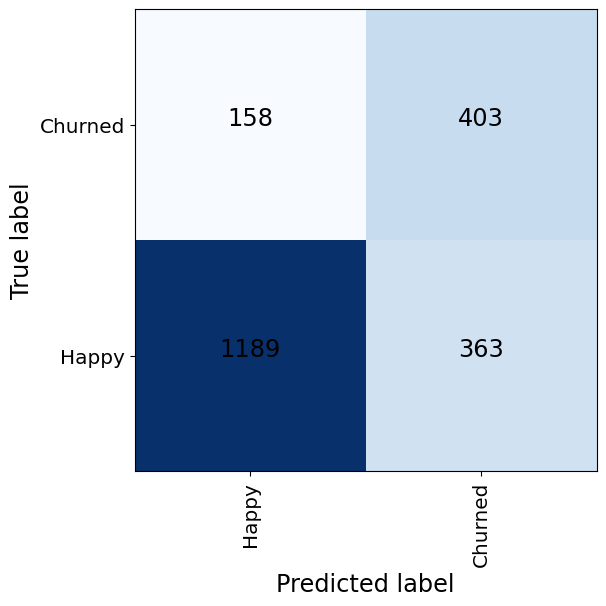

In [94]:
#Create a confusion matrix for D model

#Compute confusion matrix values
cMatrix = confusion_matrix(y_true = y_test, y_pred = y_predRF_tuned)

#Plot
fig = figure(figsize=(10, 6)) #Create figure space
plt.imshow(cMatrix, cmap=plt.cm.Blues) #Plot CM

#Add numbers to plot
plt.text(0, 0, '{}'.format(cMatrix[0, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(0, 1, '{}'.format(cMatrix[1, 0]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 0, '{}'.format(cMatrix[0, 1]), horizontalalignment='center',fontsize = 'xx-large')
plt.text(1, 1, '{}'.format(cMatrix[1, 1]), horizontalalignment='center',fontsize = 'xx-large')

tick_marks = [0,1]
labels = ['Happy', 'Churned']
plt.xticks(tick_marks, labels, rotation=90,fontsize = 'x-large')
plt.ylim([-0.5,1.5])
plt.yticks(tick_marks, labels,fontsize = 'x-large')

#Add axis labels
plt.ylabel('True label',fontsize = 'xx-large')
plt.xlabel('Predicted label',fontsize = 'xx-large')
plt.show()
#fig.savefig('Dmodel_CM.pdf', bbox_inches='tight')